<!--
IRdisplay::display_html(file='code_hiding.html')
if the line above generates an error, it could be due to this:
https://github.com/IRkernel/IRdisplay/issues/41
In the meantime, the code below is enough; it works on nbviewer but not on the notebook directly
-->
<script>
  code_show=true;
  function code_toggle() {
    if (code_show){
      $('div.input').hide();
    } else {
      $('div.input').show();
    }
    code_show = !code_show
  } 
  $( document ).ready(code_toggle);
</script>
<font size=4>
<a href="javascript:code_toggle()">Toggle ON/OFF</a>
code cells.
</font>

# Joint entropy of the simplest Markov chain
First, let's compute the entropy of a sequence of observations $(x_1,\ldots,x_n)$ from a stationary Markov chain with two states and a symmetric transition rate $h$.

The entropy of the stationary distribution is $1$ bit.

What is the entropy of two observations?

Recall the equations:
$$H(X_1, X_2)=H(X_1)+H(X_2|X_1)$$
$$I(X_1;X_2)=H(X_2)-H(X_2|X_1)$$
In addition, with the simple statistics of our Markov chain, 
$$H(X_2|X_1)=-h\log_2 h - (1-h)\log_2 (1-h)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams.update({'font.size': 19})

In [ ]:
def cond_ent(h):
    return -h*np.log2(h) - (1-h)*np.log2(1-h)

[[<matplotlib.axis.YTick at 0x7f6a7ed2e4e0>,
 (0, 2.1),
 Text(0,0.5,'bits'),
 Text(0.5,0,'h'),
 Text(0.5,1,'joint entropy H(X1,X2)')]

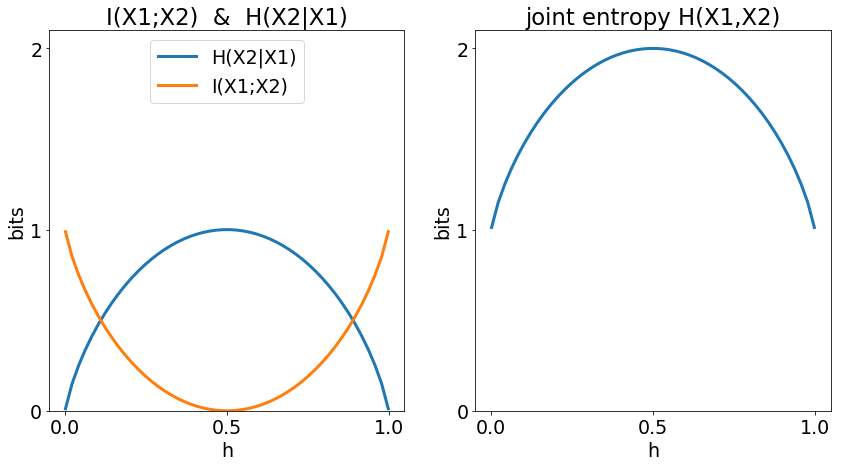

In [33]:
# %matplotlib inline
h = np.linspace(0.001, .999)
_, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(h, cond_ent(h), linewidth=3)
ax1.plot(h, 1-cond_ent(h), linewidth=3)
ax1.set(xlabel='h',
        ylabel='bits',
        title='I(X1;X2)  &  H(X2|X1)',
        ylim=[0,2+.1],
        yticks=[0,1,2],
        xticks=[0,0.5,1])
ax1.legend(['H(X2|X1)','I(X1;X2)'], loc='upper center')
# ax1.set_xlabel('h')
# ax1.set_title('conditional entropy H(X2|X1)')
# ax1.set_ylim(0,2)
# ax1.

joint_ent = 1 + cond_ent(h)
ax2.plot(h, joint_ent, linewidth=3)
ax2.set(xlabel='h',
        ylabel='bits',
        title='joint entropy H(X1,X2)',
        ylim=[0,2+.1],
        yticks=[0,1,2],
        xticks=[0,0.5,1])
# ax2.legend(['H(X2|X1)','I(X1;X2)'], loc='upper center')

As $h$ gets closer to 0.5, $X_2$ and $X_1$ become more and more independent. Their mutual information decreases while their joint entropy increases.

The same plots with $|h-0.5|$ in the x axis become:

[[<matplotlib.axis.YTick at 0x7f6a7ec745c0>,
 (0, 2.1),
 Text(0,0.5,'bits'),
 Text(0.5,0,'|h-0.5|'),
 Text(0.5,1,'joint entropy H(X1,X2)')]

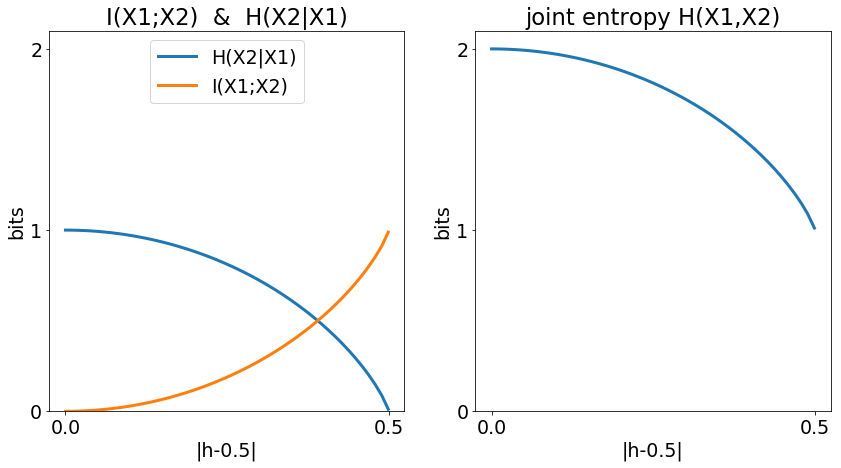

In [32]:
h_dist = 0.5 - np.linspace(0.001, .5)
h_reparam = -h_dist + 0.5
conditional_entropy = cond_ent(h_reparam)

_, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(h_dist, conditional_entropy, linewidth=3)
ax1.plot(h_dist, 1-conditional_entropy, linewidth=3)
ax1.set(xlabel='|h-0.5|',
        ylabel='bits',
        title='I(X1;X2)  &  H(X2|X1)',
        ylim=[0,2+.1],
        yticks=[0,1,2],
        xticks=[0,0.5])
ax1.legend(['H(X2|X1)','I(X1;X2)'], loc='upper center')
# ax1.set_xlabel('h')
# ax1.set_title('conditional entropy H(X2|X1)')
# ax1.set_ylim(0,2)
# ax1.

ax2.plot(h_dist, 1 + conditional_entropy, linewidth=3)
ax2.set(xlabel='|h-0.5|',
        ylabel='bits',
        title='joint entropy H(X1,X2)',
        ylim=[0,2+.1],
        yticks=[0,1,2],
        xticks=[0,0.5])
# ax2.legend(['H(X2|X1)','I(X1;X2)'], loc='upper center')

What about $N$ observations? The equation simply becomes,
$$H(X_1,\ldots,X_n)=-(n-1)I(X_1;X_2)+\sum_{i=1}^nH(X_i)=1+(n-1)H(X_2|X_1),$$

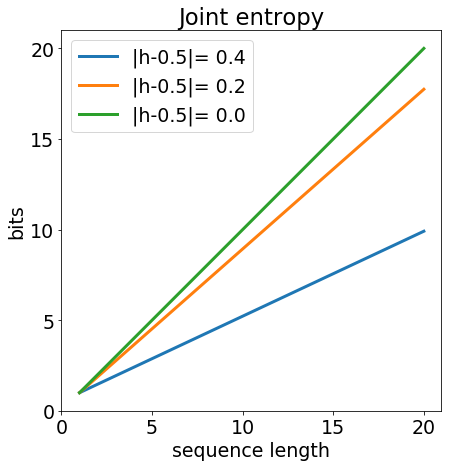

In [29]:
discrete_h = np.array([.1,.3,.5])
N=20
num_obs = np.arange(1,N+1)
_, ax = plt.subplots()
for h_val in discrete_h:
    ax.plot(num_obs, 1+cond_ent(h_val)*(num_obs-1), linewidth=3)
ax.set(xlabel='sequence length',
       ylabel='bits',
       title='Joint entropy',
       ylim=[0,N+1], 
       xticks=np.arange(0,N+1,5),
       yticks=np.arange(0,N+1,5))
ax.legend([f"|h-0.5|= {abs(x-0.5)}" for x in discrete_h])
ax.set_aspect('equal')

In other words, the joint entropy of a finite sequence of realizations from our Markov chain is linear in the number of observations, and the rate of growth is parameterized by $|h-0.5|$.

## Link to our auditory change-point task
The Markov chain $X_n$ described above has the same statistics as our source variable $S_n$, _if the hazard rate $h$ is kept constant_.

What happens if we allow $h$ to vary according to its own Markovian dynamics?